**P-Value use case in StartUp Revenue Prediction**:<br>Finding features that are unlikely to contribute significantly to the prediction of result (profit here) and performing feature selection

# Importing the Dataset (50_Startups)

In [135]:
 # Importing the libraries
import numpy as np
import pandas as pd

In [136]:
#Importing the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/Fasgarinejad/MLDS_Mathematics/main/Datasets/50_Startups.csv')
dataframe = pd.DataFrame(dataset, columns=dataset.columns)
dataframe.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Initial Analysis of the Dataset


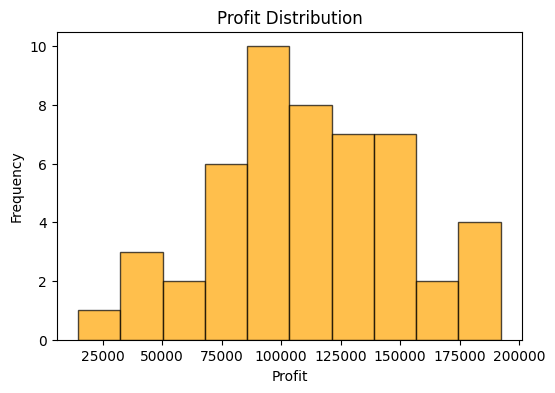

In [137]:
import matplotlib.pyplot as plt

#distribution of the profits
plt.figure(figsize=(6,4))
plt.hist(dataset['Profit'], bins=10, color='orange', edgecolor='black', alpha=0.7)
plt.title('Profit Distribution')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()


In [138]:
missing_values_per_column = dataset.isnull().sum()
for column, missing_count in missing_values_per_column.items():
    print("Column {}'s missing values #: {}".format(column, missing_count))

Column R&D Spend's missing values #: 0
Column Administration's missing values #: 0
Column Marketing Spend's missing values #: 0
Column State's missing values #: 0
Column Profit's missing values #: 0


<br><br><br><br><br>
### **Question**: will the profit improve with increased money spent on either of <strong>Research and Development</strong>, <strong>Administration</strong>, and <strong>Marketing</strong>?


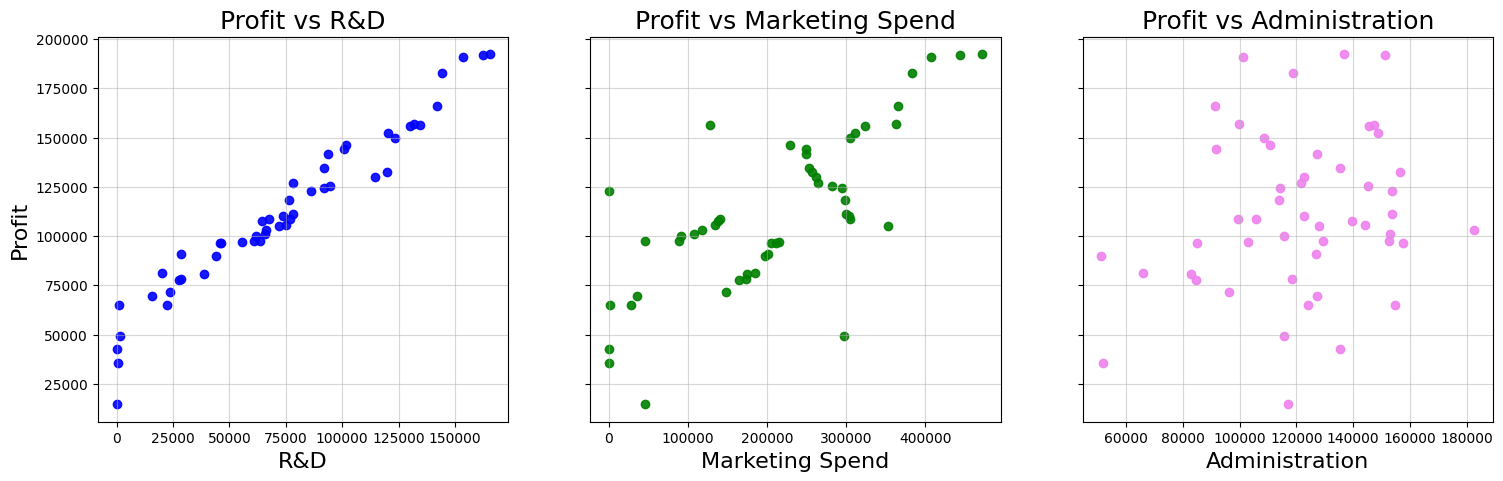

In [139]:
import pandas as pd
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for ax in axes:
    ax.grid(alpha=0.5)
#Profit vs R&D (how changes in R&D can impact)
axes[0].scatter(dataset['R&D Spend'], dataset['Profit'], color='blue', alpha=0.9)
axes[0].set_title('Profit vs R&D', fontsize=18)
axes[0].set_xlabel('R&D', fontsize=16)
axes[0].set_ylabel('Profit', fontsize=16)

#Profit vs Marketing
axes[1].scatter(dataset['Marketing Spend'], dataset['Profit'], color='green', alpha=0.9)
axes[1].set_title('Profit vs Marketing Spend', fontsize=18)
axes[1].set_xlabel('Marketing Spend', fontsize=16)

#Profit vs Administration
axes[2].scatter(dataset['Administration'], dataset['Profit'], color='violet', alpha=0.9)
axes[2].set_title('Profit vs Administration', fontsize=18)
axes[2].set_xlabel('Administration', fontsize=16)

plt.show()


<br><br><br><br><br>

### How Correlated different columns are?


The Pearson correlation coefficient measures the linear relationship between two variables $Y$ and $X$ using the following formula:

$$
r = \frac{\text{Cov(X,Y)}}{\sigma_X \sigma_Y}
$$
<br>
$$
 = \frac{\frac{1}{n} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\frac{1}{n} \sum_{i=1}^{n} (X_i - \bar{X})^2} * \sqrt{\frac{1}{n} \sum_{i=1}^{n} (Y_i - \bar{Y})^2}}
$$

- If $r = 1$: There is perfect positive linear relationship between X and Y.
- If $r = -1$: There is perfect negative linear relationship between X and Y.
- If $r = 0$: There is no linear relationship between X and Y.
- If $0 < r < 1$: There is positive linear relationship (stronger correlation as \( r \) approaches 1).
- If $-1 < r < 0$: There is negative linear relationship (stronger correlation as \( r \) approaches -1).


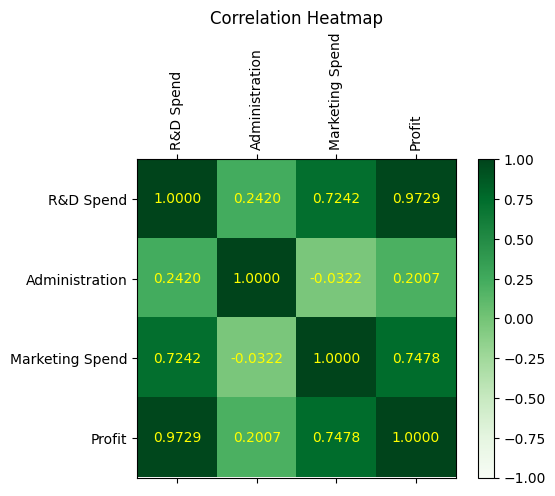

In [140]:
corr = dataset[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']].corr()
fig, ax = plt.subplots(figsize=(6, 5))
cax = ax.matshow(corr, cmap='Greens', vmin=-1.00, vmax=1.00)
fig.colorbar(cax)

for (i, j), val in np.ndenumerate(corr):
    ax.text(j, i, f"{val:.4f}", ha='center', va='center', color='yellow', fontsize=10)

ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns, fontsize=10)
ax.set_yticklabels(corr.columns, fontsize=10)

plt.xticks(rotation=90, ha='center')

plt.title('Correlation Heatmap', fontsize=12)
plt.tight_layout()
plt.show()


Note: Correlation is great for understanding how strongly two variables are related, but it does not indicate causality or statistical significance

# Linear Regression: Predicting the Profit based on the features

Profit = 	R&D Spend *coefficient 1 +	Administration * coefficient 2 +	Marketing Spend * coefficient 3 + State * coeficient 4 + intercept



In [186]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#Separating independent and dependent varaiables
X = dataset.iloc[:, :-1].values #[R&D Spend, Administration, Marketing Spend, State]
y = dataset.iloc[:, -1].values #Profit

# Encoding categorical data
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X = X[:, 1:] #avoiding dummy variable's trap

#splitting the data to training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Training the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#Evaluating the trained model on the test data
y_pred = regressor.predict(X_test)
r2_score = regressor.score(X_test, y_test)
print(f"R² Score: {r2_score:.2f}")

R² Score: 0.93


$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_{\text{true},i} - y_{\text{pred},i})^2}{\sum_{i=1}^{n} (y_{\text{true},i} - \bar{y})^2}
$$

In [187]:
coefficients = regressor.coef_
intercept = regressor.intercept_
print(f"Profit =  R&D * {np.round(coefficients[2],4)} + Administration * {np.round(coefficients[3],4)} + Marketing * {np.round(coefficients[4],4)} + State1 * {np.round(coefficients[0], 4)} + State2 * {np.round(coefficients[1],4)}+ {np.round(intercept)}")

Profit =  R&D * 0.7735 + Administration * 0.0329 + Marketing * 0.0366 + State1 * -959.2842 + State2 * 699.3691+ 42554.0


Profit =  R&D * 0.7735 + Administration * 0.0329 + Marketing * 0.0366 + State1 * -959.2842 + State2 * 699.3691+ 42554.0

In [191]:
coef_dict = {"State1": coefficients[0], "State2": coefficients[1], "R&D": coefficients[2], "Administration": coefficients[3], "Marketing": coefficients[4]}
for x, (key, value) in enumerate(coef_dict.items()):
    print("X{} ({}): {}".format(x+1, key, value))

X1 (State1): -959.2841600539822
X2 (State2): 699.3690525189354
X3 (R&D): 0.7734671927329018
X4 (Administration): 0.03288459753608208
X5 (Marketing): 0.036610025863751616


<br><br><br><br><br>

### Building the optimal model using Backward Elimination

In [190]:
import statsmodels.api as sm
X = np.append(arr = np.ones((50, 1)).astype(int), values = X, axis = 1)

X_optimal = X[:, [0, 1, 2, 3, 4 ,5]]
X_optimal = X_optimal.astype(np.float64)
regressor_OLS = sm.OLS(endog = y, exog = X_optimal).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 21 Jan 2025   Prob (F-statistic):           1.34e-27
Time:                        04:43:45   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [193]:
X_optimal = X[:, [0, 1, 3, 4, 5]]
X_optimal = X_optimal.astype(np.float64)
regressor_OLS = sm.OLS(endog = y, exog = X_optimal).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Tue, 21 Jan 2025   Prob (F-statistic):           8.49e-29
Time:                        04:44:42   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [194]:
X_opt = X[:, [0, 3, 4, 5]]
X_opt = X_opt.astype(np.float64)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 21 Jan 2025   Prob (F-statistic):           4.53e-30
Time:                        04:44:52   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [99]:
X_opt = X[:, [0, 3, 5]]
X_opt = X_opt.astype(np.float64)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
#Note: A high p-value doesn not necessarily mean a feature is unimportant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.010
Date:                Tue, 21 Jan 2025   Prob (F-statistic):              0.372
Time:                        04:15:04   Log-Likelihood:                -599.60
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      47   BIC:                             1211.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.613e+04   2.59e+04      2.942      0.005    2.41e+04    1.28e+05
x1          2555.2116    1.2e+04      0.212      0.833   -2.16e+04    2.68e+04
x2             0.2885      0.205      1.404      0.167      -0.125       0.702
==============================================================================
Omnibus:                        0.119   Durbin-Watson:                   0.097
Prob(Omnibus):                  0.942   Jarque-Bera (JB):                0.139
Skew:                           0.099   Prob(JB):                        0.933
Kurtosis:                       2.835   Cond. No.                     5.67e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
X_opt = X[:, [0, 3]]
X_opt = X_opt.astype(np.float64)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.04727
Date:                Tue, 21 Jan 2025   Prob (F-statistic):              0.829
Time:                        04:15:18   Log-Likelihood:                -600.63
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      48   BIC:                             1209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.111e+05   7085.628     15.682      0.000    9.69e+04    1.25e+05
x1          2642.1322   1.22e+04      0.217      0.829   -2.18e+04    2.71e+04
==============================================================================
Omnibus:                        0.011   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.994   Jarque-Bera (JB):                0.082
Skew:                           0.022   Prob(JB):                        0.960
Kurtosis:                       2.807   Cond. No.                         2.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


<br><br><br><br><br><br>
<br><br><br>
<br><br><br>
<br><br><br>
<br><br><br>
<br><br><br>
<br><br><br>
<br><br><br>
<br><br><br>










he goal of OLS is to find the coefficients that minimize the sum of squared residuals (the difference between the observed and predicted values):
Minimize